In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['gld_price_data.csv']


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [7]:
df = pd.read_csv('../input/gld_price_data.csv')

# display first five observations using head()
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
#Lets have a quick look of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
Date       2290 non-null object
SPX        2290 non-null float64
GLD        2290 non-null float64
USO        2290 non-null float64
SLV        2290 non-null float64
EUR/USD    2290 non-null float64
dtypes: float64(5), object(1)
memory usage: 107.4+ KB


In [9]:
#Clearly we see there is no null value in the dataset
#Lets study the Statistical Inferance of the dataset
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303296
75%,2073.010070,132.840004,37.827501,22.882499,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [10]:
##Let us now see the number of variables and observations in the data.**

# Regression is prefered when Target is continuous and more features are also continuous

# use 'shape' to check the dimension of data
df.shape

##Interpretation:** The data has 2209 observations and 6 variables.

(2290, 6)

In [11]:
##Remove Insignificant Variables
##The column date is redundant for further analysis. Thus, we drop the column.

# drop the column 'Emp_ID' using drop()
# 'axis = 1' drops the specified column
df = df.drop('Date',axis=1)

In [12]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


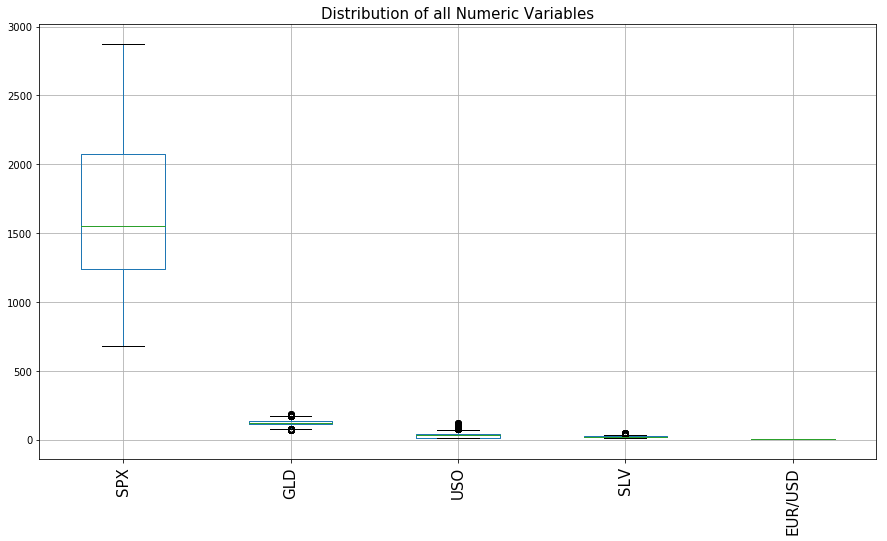

In [13]:
##Outlier Analysis and Treatment
##Check the outliers in all the variables and treat them using appropriate techniques.

# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Numeric Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

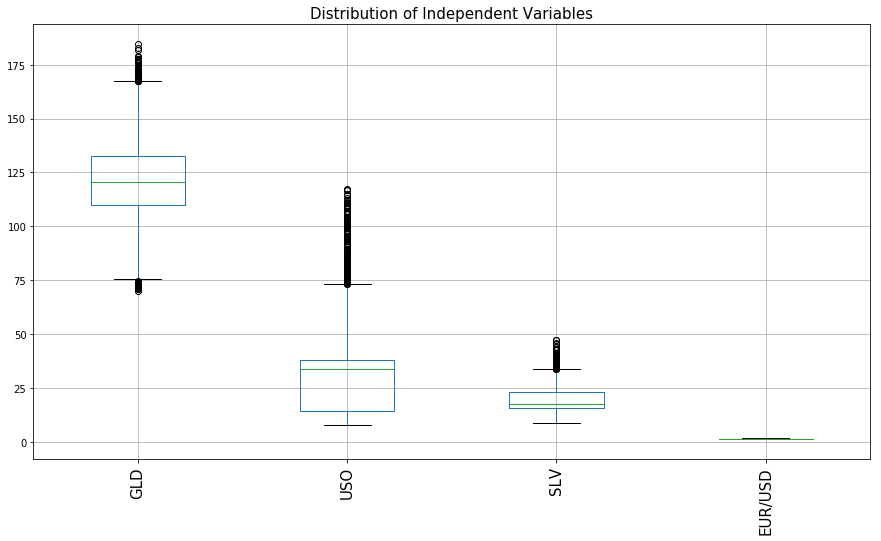

In [14]:
# boxplot of independent variables

# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot boxplots of all the numeric variables except the variables 'Income', 'Total_Income' and 'Total_Reimbursement' 
# use 'loc[]' to select the variables
df.loc[:,['GLD','USO','SLV','EUR/USD']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [15]:
#Let us use the IQR method to remove the outliers.

# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

# retrieve the dataframe without the outliers
# '~' returns the values that do not satisfy the given conditions 
# i.e. it returns values between the range [Q1-1.5*IQR, Q3+1.5*IQR]
# '|' is used as 'OR' operator on multiple conditions   
# 'any(axis=1)' checks the entire row for atleast one 'True' entry (those rows represents outliers in the data)

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df.shape

(1960, 5)

In [16]:
#Missing Value Analysis and Treatment
#Check the presence of missing values in the data and treat them.

# sort the variables on the basis of total null values in the variable
# 'isnull().sum()' returns the number of missing values in each variable
# 'ascending = False' sorts values in the descending order
# the variable with highest number of missing values will appear first

Total = df.isnull().sum().sort_values(ascending=False)          
#print(Total)
# calculate percentage of missing values
# 'ascending = False' sorts values in the descending order
# the variable with highest percentage of missing values will appear first
Percent = (df.isnull().sum()*100/df.isnull().count()).sort_values(ascending=False)   
#print(df_reimb.isnull().count()))

# concat the 'Total' and 'Percent' columns using 'concat' function
# pass a list of column names in parameter 'keys' 
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percentage of Missing Values'])    
missing_data

#Interpretation: There are no missing values in the data.

,Total,Percentage of Missing Values
EUR/USD,0,0.0
SLV,0,0.0
USO,0,0.0
GLD,0,0.0
SPX,0,0.0


Text(0.5, 1.05, 'Correlation of df Features')

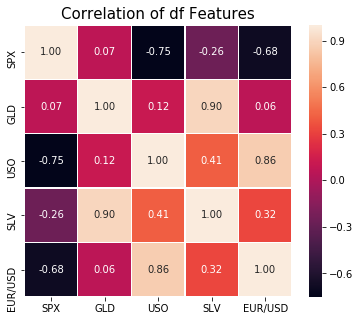

In [17]:
#Now see the correlation matrix and heatmap
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
plt.figure(figsize = (6,5))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True,fmt='.2f',linewidths=0.30)
plt.title('Correlation of df Features', y = 1.05, size=15)

In [18]:
#Lets look the correlation score
print (corr['GLD'].sort_values(ascending=False), '\n')

GLD        1.000000
SLV        0.902796
USO        0.116710
SPX        0.069188
EUR/USD    0.057211
Name: GLD, dtype: float64 



In [19]:
# https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn

def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    plt.show()
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)
    plt.show()

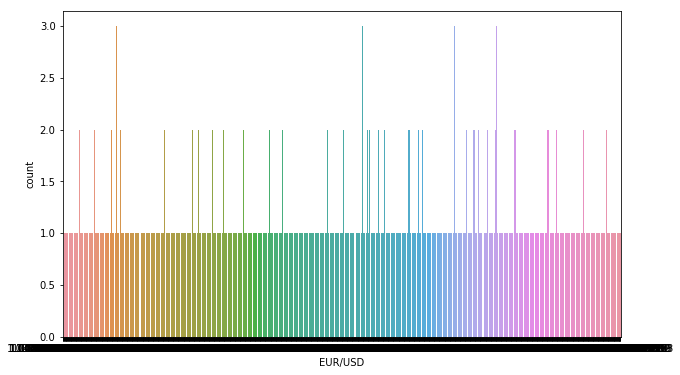

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='EUR/USD',data=df)


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


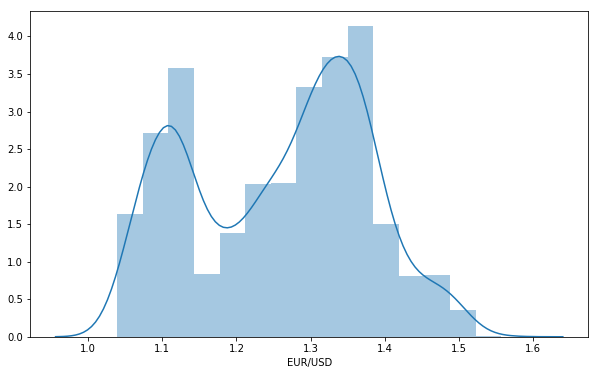

In [21]:
plt.figure(figsize=(10,6))
sns.distplot(df['EUR/USD'])

In [22]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


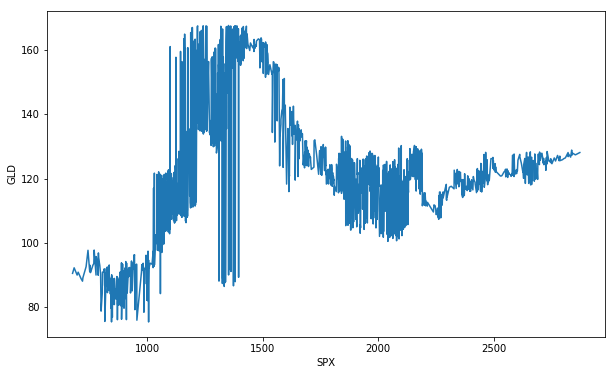

In [23]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x='SPX',y='GLD')

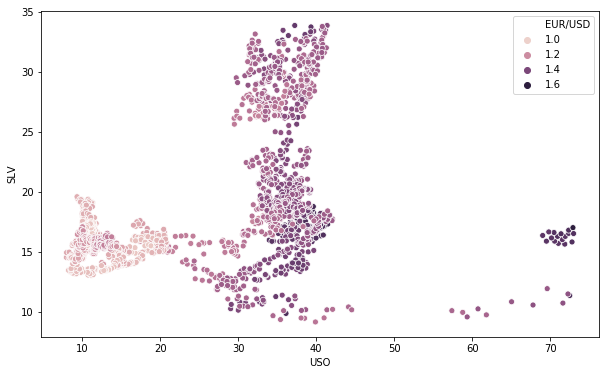

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='USO',y='SLV',hue = 'EUR/USD')

In [25]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [26]:
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Skewness: %f 0.4248187033069933
Kurtosis: 0.143476


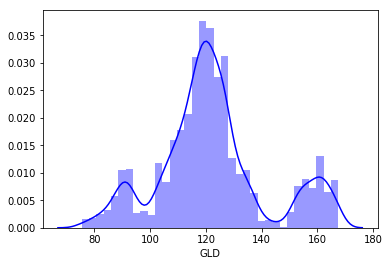

In [27]:
#Lets Check our target variable
sns.distplot(df['GLD'], color = 'blue')
print('Skewness: %f', df['GLD'].skew())
print("Kurtosis: %f" % df['GLD'].kurt())

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


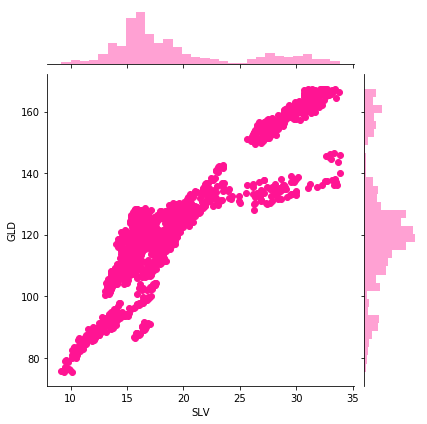

In [28]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SLV'], y = df['GLD'], color = 'deeppink')

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


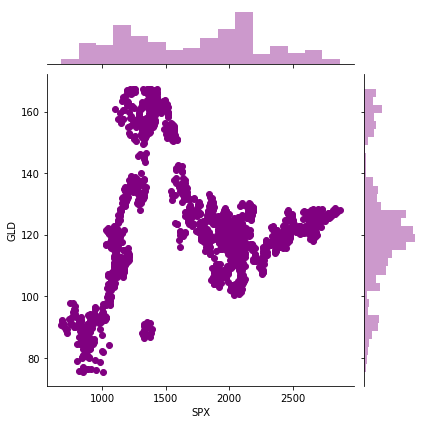

In [29]:
#Now we check the relation with GLD variable
sns.jointplot(x =df['SPX'], y = df['GLD'], color = 'purple')

In [30]:
# scale the independent numeric and target variable
#Logic is of standard Scaler
df.iloc[:, 2:11] = df.iloc[:, 2:11].apply(lambda rec: (rec - rec.mean()) / rec.std())

df.head()

,SPX,GLD,USO,SLV,EUR/USD
9,1380.949951,87.989998,3.647589,-0.566627,1.867228
10,1373.199951,86.699997,3.573447,-0.598719,1.751095
11,1333.250000,86.500000,3.508075,-0.587487,1.730863
12,1325.189941,87.419998,3.548733,-0.531681,1.712322
13,1310.500000,88.169998,3.469808,-0.554503,1.737543


In [31]:
#Now Lets create a ml model
# Now lets take our matrix of feature and target
x_trail = df[['SPX','USO','SLV','EUR/USD']]
x = x_trail.iloc[:, :].values
y = df.iloc[:, 2].values

In [32]:
#Spliting the dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [33]:
# build a model on training dataset
# fit() is used to fit the OLS model
MLR_full_model = sm.OLS(y_train, x_train).fit()

# print the summary output
print(MLR_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.740e+28
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        16:56:51   Log-Likelihood:                 45160.
No. Observations:                1568   AIC:                        -9.031e+04
Df Residuals:                    1564   BIC:                        -9.029e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -4.169e-17   1.08e-18    -38.439      0.0

In [34]:
#Now fitting the Random forest regression to the traning set
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [35]:
#Now predicting the test set result
y_pred = regressor.predict(x_test)

In [36]:
#Now Check the error for regression
from sklearn import metrics
print('MAE :'," ", metrics.mean_absolute_error(y_test,y_pred))
print('MSE :'," ", metrics.mean_squared_error(y_test,y_pred))
print('RMAE :'," ", np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE :   0.003507078875184033
MSE :   0.0005194231371615999
RMAE :   0.0227908564376506


In [37]:
#Now Lets Check the Training and Test set Accuracy
accuracy_train = regressor.score(x_train, y_train)
accuracy_test = regressor.score(x_test, y_test)
print(accuracy_train)
print(accuracy_test)

0.9999823109008006
0.9995315183516197


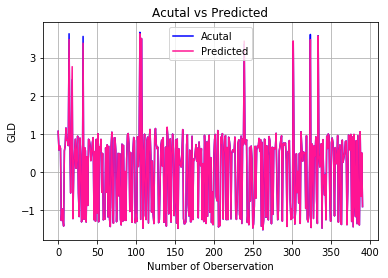

In [42]:
#Visualising the Accuracy of Predicted result
plt.plot(y_test, color = 'blue', label = 'Acutal')
plt.plot(y_pred, color = 'deeppink', label = 'Predicted')
plt.grid(0.3)
plt.title('Acutal vs Predicted')
plt.xlabel('Number of Oberservation')
plt.ylabel('GLD')
plt.legend()
plt.show()

In [43]:
# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


# import function to perform linear regression
from sklearn.linear_model import LinearRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import SGDRegressor from sklearn to perform linear regression with stochastic gradient descent
from sklearn.linear_model import SGDRegressor

# import function for ridge regression
from sklearn.linear_model import Ridge

# import function for lasso regression
from sklearn.linear_model import Lasso

# import function for elastic net regression
from sklearn.linear_model import ElasticNet

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV

In [52]:
#Create generalized functions to calculate various metrics for models
#Create a generalized function to calculate the RMSE for train and test set.
# create a generalized function to calculate the RMSE values for train set
def get_train_rmse(model):
    
    # For training set:
    # train_pred: prediction made by the model on the training dataset 'X_train'
    # y_train: actual values ofthe target variable for the train dataset

    # predict the output of the target variable from the train data 
    train_pred = model.predict(x_train)

    # calculate the MSE using the "mean_squared_error" function

    # MSE for the train data
    mse_train = mean_squared_error(y_train, train_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_train = round(np.sqrt(mse_train), 4)
    
    # return the training RMSE
    return(rmse_train)

In [53]:
# create a generalized function to calculate the RMSE values test set
def get_test_rmse(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(x_test)

    # MSE for the test data
    mse_test = mean_squared_error(y_test, test_pred)

    # take the square root of the MSE to calculate the RMSE
    # round the value upto 4 digits using 'round()'
    rmse_test = round(np.sqrt(mse_test), 4)

    # return the test RMSE
    return(rmse_test)

In [54]:
# define a function to calculate MAPE
# pass the actual and predicted values as input to the function
# return the calculated MAPE 
def mape(actual, predicted):
    return (np.mean(np.abs((actual - predicted) / actual)) * 100)

def get_test_mape(model):
    
    # For testing set:
    # test_pred: prediction made by the model on the test dataset 'X_test'
    # y_test: actual values of the target variable for the test dataset

    # predict the output of the target variable from the test data
    test_pred = model.predict(x_test)
    
    # calculate the mape using the "mape()" function created above
    # calculate the MAPE for the test data
    mape_test = mape(y_test, test_pred)

    # return the MAPE for the test set
    return(mape_test)

In [55]:
# define a function to get R-squared and adjusted R-squared value
def get_score(model):
    
    # score() returns the R-squared value
    r_sq = model.score(x_train, y_train)
    
    # calculate adjusted R-squared value
    # 'n' denotes number of observations in train set
    # 'shape[0]' returns number of rows 
    n = x_train.shape[0]
    
    # 'k' denotes number of variables in train set
    # 'shape[1]' returns number of columns
    k = x_train.shape[1]
    
    # calculate adjusted R-squared using the formula
    r_sq_adj = 1 - ((1-r_sq)*(n-1)/(n-k-1))
    
    # return the R-squared and adjusted R-squared value 
    return ([r_sq, r_sq_adj])

In [56]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Test_RMSE', 'Test_MAPE'])

# create a function to update the score card for comparision of the scores from different algorithms
# pass the model name, model build, alpha and l1_ration as input parameters
# if 'alpha' and/or 'l1_ratio' is not specified, the function assigns '-'
def update_score_card(algorithm_name, model, alpha = '-', l1_ratio = '-'):
    
    # assign 'score_card' as global variable
    global score_card

    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    score_card = score_card.append({'Model_Name': algorithm_name,
                       'Alpha (Wherever Required)': alpha, 
                       'l1-ratio': l1_ratio, 
                       'Test_MAPE': get_test_mape(model), 
                       'Test_RMSE': get_test_rmse(model), 
                       'R-Squared': get_score(model)[0], 
                       'Adj. R-Squared': get_score(model)[1]}, ignore_index = True)

In [57]:
# define a function to plot a barplot
# pass the model 
def plot_coefficients(model, algorithm_name):
    # create a dataframe of variable names and their corresponding value of coefficients obtained from model
    # 'columns' returns the column names of the dataframe 'X'
    # 'coef_' returns the coefficient of each variable
    df_coeff = pd.DataFrame({'Variable': X.columns, 'Coefficient': model.coef_})

    # sort the dataframe in descending order
    # 'sort_values' sorts the column based on the values
    # 'ascending = False' sorts the values in the descending order
    sorted_coeff = df_coeff.sort_values('Coefficient', ascending = False)

    # plot a bar plot with Coefficient on the x-axis and Variable names on y-axis
    # pass the data to the parameter, 'sorted_coeff' to plot the barplot
    sns.barplot(x = "Coefficient", y = "Variable", data = sorted_coeff)
    
    # add x-axis label
    # set the size of the text using 'fontsize'
    plt.xlabel("Coefficients from {}".format(algorithm_name), fontsize = 15)

    # add y-axis label
    # set the size of the text using 'fontsize'
    plt.ylabel('Features', fontsize = 15)

In [59]:
# initiate linear regression model
linreg = LinearRegression()

# build the model using X_train and y_train
# use fit() to fit the regression model
MLR_model = linreg.fit(x_train, y_train)

# print the R-squared value for the model
# score() returns the R-squared value
MLR_model.score(x_train, y_train)

1.0

In [60]:
# print training RMSE
print('RMSE on train set: ', get_train_rmse(MLR_model))

# print training RMSE
print('RMSE on test set: ', get_test_rmse(MLR_model))

# calculate the difference between train and test set RMSE
difference = abs(get_test_rmse(MLR_model) - get_train_rmse(MLR_model))

# print the difference between train and test set RMSE
print('Difference between RMSE on train and test set: ', difference)

RMSE on train set:  0.0
RMSE on test set:  0.0
Difference between RMSE on train and test set:  0.0


In [61]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression', model = MLR_model)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,1.0,1.0,0.0,6.936003e-14


In [63]:
 #Stochastic Gradient Descent

# instantiate the SGDRegressor
# set 'random_state' to generate the same dataset each time you run the code 
sgd = SGDRegressor(random_state = 10)

# build the model on train data 
# use fit() to fit the model
linreg_with_SGD = sgd.fit(x_train, y_train)

# print RMSE for train set
# call the function 'get_train_rmse'
print('RMSE on train set:', get_train_rmse(linreg_with_SGD))

# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(linreg_with_SGD))

RMSE on train set: 3113594146026062.0
RMSE on test set: 3082249004121868.5


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [65]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Linear Regression (using SGD)', model = linreg_with_SGD)

# print the dataframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,1.000000e+00,1.000000e+00,0.000000e+00,6.936003e-14
1,Linear Regression (using SGD),-,-,-9.976408e+30,-1.000194e+31,3.082249e+15,6.253004e+17


In [68]:
#Elastic Net Regression

# use ElasticNet() to perform Elastic Net regression
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'l1_ratio = 0' performs Ridge regression
# 'l1_ratio = 1' performs Lasso regression
# pass number of iterations to 'max_iter'
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train data
enet.fit(x_train, y_train)


# print RMSE for test set
# call the function 'get_test_rmse'
print('RMSE on test set:', get_test_rmse(enet))

RMSE on test set: 0.1609


In [69]:
# update the dataframe 'score_card'
update_score_card(algorithm_name = 'Elastic Net Regression', model = enet, alpha = '0.1', l1_ratio = '0.01')

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,1.000000e+00,1.000000e+00,0.000000e+00,6.936003e-14
1,Linear Regression (using SGD),-,-,-9.976408e+30,-1.000194e+31,3.082249e+15,6.253004e+17
2,Elastic Net Regression,0.1,0.01,9.806232e-01,9.805736e-01,1.609000e-01,4.560388e+01


In [71]:
#GridSearchCV

# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[1e-15, 1e-10, 1e-8, 1e-4,1e-3, 1e-2, 0.1, 1, 5, 10, 20, 40, 60, 80, 100]}]
 
# initiate the ridge regression model
ridge = Ridge()

# use GridSearchCV() to find the optimal value of alpha
# estimator: pass the ridge regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
ridge_grid = GridSearchCV(estimator = ridge, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
ridge_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Ridge Regression: ', ridge_grid.best_params_, '\n')

# print the RMSE for test set using the model having optimal value of alpha
print('RMSE on test set:', get_test_rmse(ridge_grid))

Best parameters for Ridge Regression:  {'alpha': 1e-15} 

RMSE on test set: 0.0


In [72]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Ridge Regression (using GridSearchCV)', 
                  model = ridge_grid, 
                  alpha = ridge_grid.best_params_.get('alpha'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,1.000000e+00,1.000000e+00,0.000000e+00,6.936003e-14
1,Linear Regression (using SGD),-,-,-9.976408e+30,-1.000194e+31,3.082249e+15,6.253004e+17
2,Elastic Net Regression,0.1,0.01,9.806232e-01,9.805736e-01,1.609000e-01,4.560388e+01
3,Ridge Regression (using GridSearchCV),1e-15,-,1.000000e+00,1.000000e+00,0.000000e+00,1.046905e-12


In [73]:
# create a dictionary with hyperparameters and its values
# 'alpha' assigns the regularization strength to the model
# 'l1_ratio' is the ElasticNet mixing parameter
# 'max_iter' assigns maximum number of iterations for the model to run
tuned_paramaters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],
                      'l1_ratio':[0.0001, 0.0002, 0.001, 0.01, 0.1, 0.2]}]

# initiate the elastic net regression model  
enet = ElasticNet()

# use GridSearchCV() to find the optimal value of alpha and l1_ratio
# estimator: pass the elastic net regression model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 10
enet_grid = GridSearchCV(estimator = enet, 
                          param_grid = tuned_paramaters, 
                          cv = 10)

# fit the model on X_train and y_train using fit()
enet_grid.fit(x_train, y_train)

# get the best parameters
print('Best parameters for Elastic Net Regression: ', enet_grid.best_params_, '\n')

# print the RMSE for the test set using the model having optimal value of alpha and l1-ratio
print('RMSE on test set:', get_test_rmse(enet_grid))

Best parameters for Elastic Net Regression:  {'alpha': 0.0001, 'l1_ratio': 0.2} 

RMSE on test set: 0.0001


In [74]:
# update the dataframe 'score_card'
# 'best_params_' returns the dictionary containig best parameter values and parameter name  
# 'get()' returns the value of specified parameter
update_score_card(algorithm_name = 'Elastic Net Regression (using GridSearchCV)', 
                  model = enet_grid, 
                  alpha = enet_grid.best_params_.get('alpha'), 
                  l1_ratio = enet_grid.best_params_.get('l1_ratio'))

# print the datarframe
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,1.000000e+00,1.000000e+00,0.000000e+00,6.936003e-14
1,Linear Regression (using SGD),-,-,-9.976408e+30,-1.000194e+31,3.082249e+15,6.253004e+17
2,Elastic Net Regression,0.1,0.01,9.806232e-01,9.805736e-01,1.609000e-01,4.560388e+01
3,Ridge Regression (using GridSearchCV),1e-15,-,1.000000e+00,1.000000e+00,0.000000e+00,1.046905e-12
4,Elastic Net Regression (using GridSearchCV),0.0001,0.2,1.000000e+00,1.000000e+00,1.000000e-04,1.026272e-02


In [75]:
# sort the dataframe 'score_card' on 'Test_RMSE' in an ascending order using 'sort_values' 
# 'reset_index' resets the index of the dataframe
# 'drop = True' drops the previous index
score_card = score_card.sort_values('Test_RMSE').reset_index(drop = True)

# color the cell in the column 'Test_RMSE' having minimum RMSE value
# 'style.highlight_min' assigns color to the minimum value
# pass specified color to the parameter, 'color'
# pass the data to limit the color assignment to the parameter, 'subset' 
score_card.style.highlight_min(color = 'lightblue', subset = 'Test_RMSE')

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Test_RMSE,Test_MAPE
0,Linear Regression,-,-,1,1,0,6.936e-14
1,Ridge Regression (using GridSearchCV),1e-15,-,1,1,0,1.04691e-12
2,Elastic Net Regression (using GridSearchCV),0.0001,0.2,1,1,0.0001,0.0102627
3,Elastic Net Regression,0.1,0.01,0.980623,0.980574,0.1609,45.6039
4,Linear Regression (using SGD),-,-,-9.97641e+30,-1.00019e+31,3.08225e+15,6.253e+17
